In [ ]:
!pip install factor_analyzer


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv("Admission_Predict.csv")
data = data.dropna()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 31.2 KB


In [8]:
data = data.iloc[:,0:8]
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
calculate_bartlett_sphericity(data)

(2301.1731114158597, 0.0)

In [9]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(data)
print(kmo_model)

0.8966951994451634


In [10]:
from factor_analyzer import FactorAnalyzer
fa = FactorAnalyzer() 
fa.fit(data)
ev, v = fa.get_eigenvalues()
ev

array([4.89558448, 1.00042709, 0.71800424, 0.54661955, 0.30258584,
       0.24409411, 0.1538543 , 0.13883039])

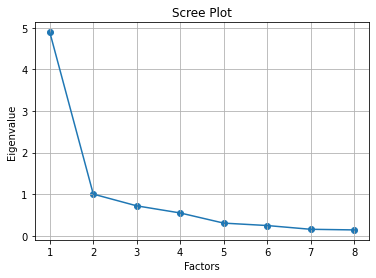

In [11]:
plt.scatter(range(1,data.shape[1]+1),ev)
plt.plot(range(1,data.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [12]:
fa1 = FactorAnalyzer(2)
fa1.fit(data)
lmatrix1 = pd.DataFrame(fa1.loadings_, index = list(data.columns), columns = ['Factor 1', 'Factor 2' ])
lmatrix1

,Factor 1,Factor 2
Serial No.,0.026440,-0.181220
GRE Score,1.087259,-0.171797
TOEFL Score,0.806672,0.099470
University Rating,0.323572,0.573073
SOP,0.064801,0.857089
LOR,0.099180,0.721105
CGPA,0.724451,0.240723
Research,0.535443,0.062744


Factor 1: GRE Score,TOFEL Score, University Ranking, CGPA, Research

Factor 2: University Ranking, SOP, LOR

In [13]:
fa2 = FactorAnalyzer(2, rotation='oblimin')
fa2.fit(data)
lmatrix2 = pd.DataFrame(fa2.loadings_, index = list(data.columns), columns = ['Factor 1', 'Factor 2'])
lmatrix2

,Factor 1,Factor 2
Serial No.,0.043753,-0.192983
GRE Score,1.037570,-0.097393
TOEFL Score,0.746066,0.172070
University Rating,0.243482,0.643070
SOP,-0.028897,0.928017
LOR,0.017568,0.784376
CGPA,0.654184,0.317530
Research,0.495557,0.110682


Factor 1:GRE score, TOFEL Score, CGPA
Factor 2:University Ranking, LOR, SOP
